In [15]:
import os
from glob import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np

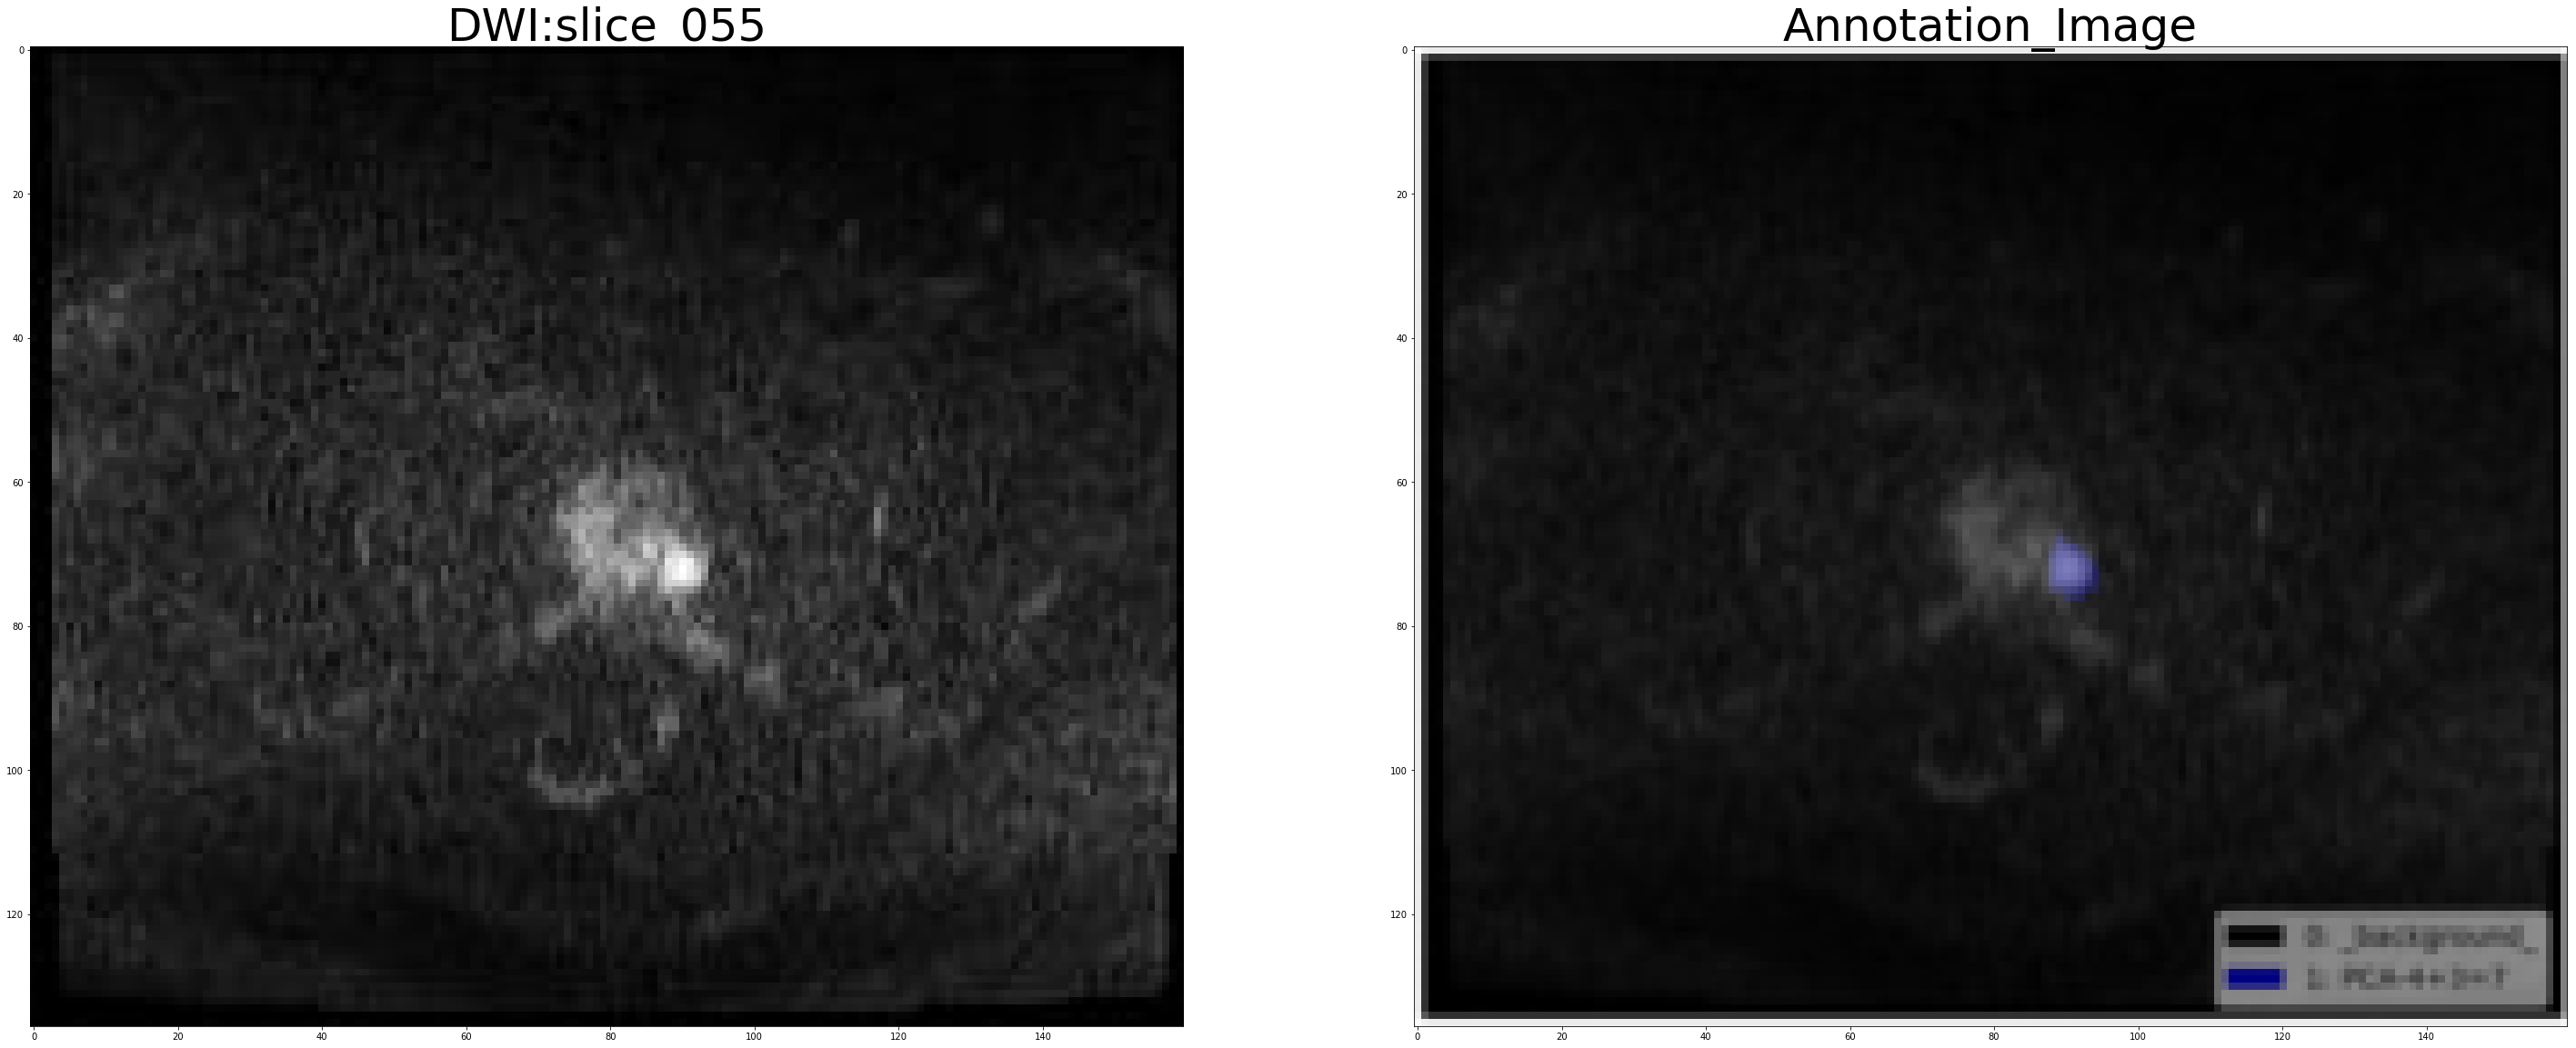

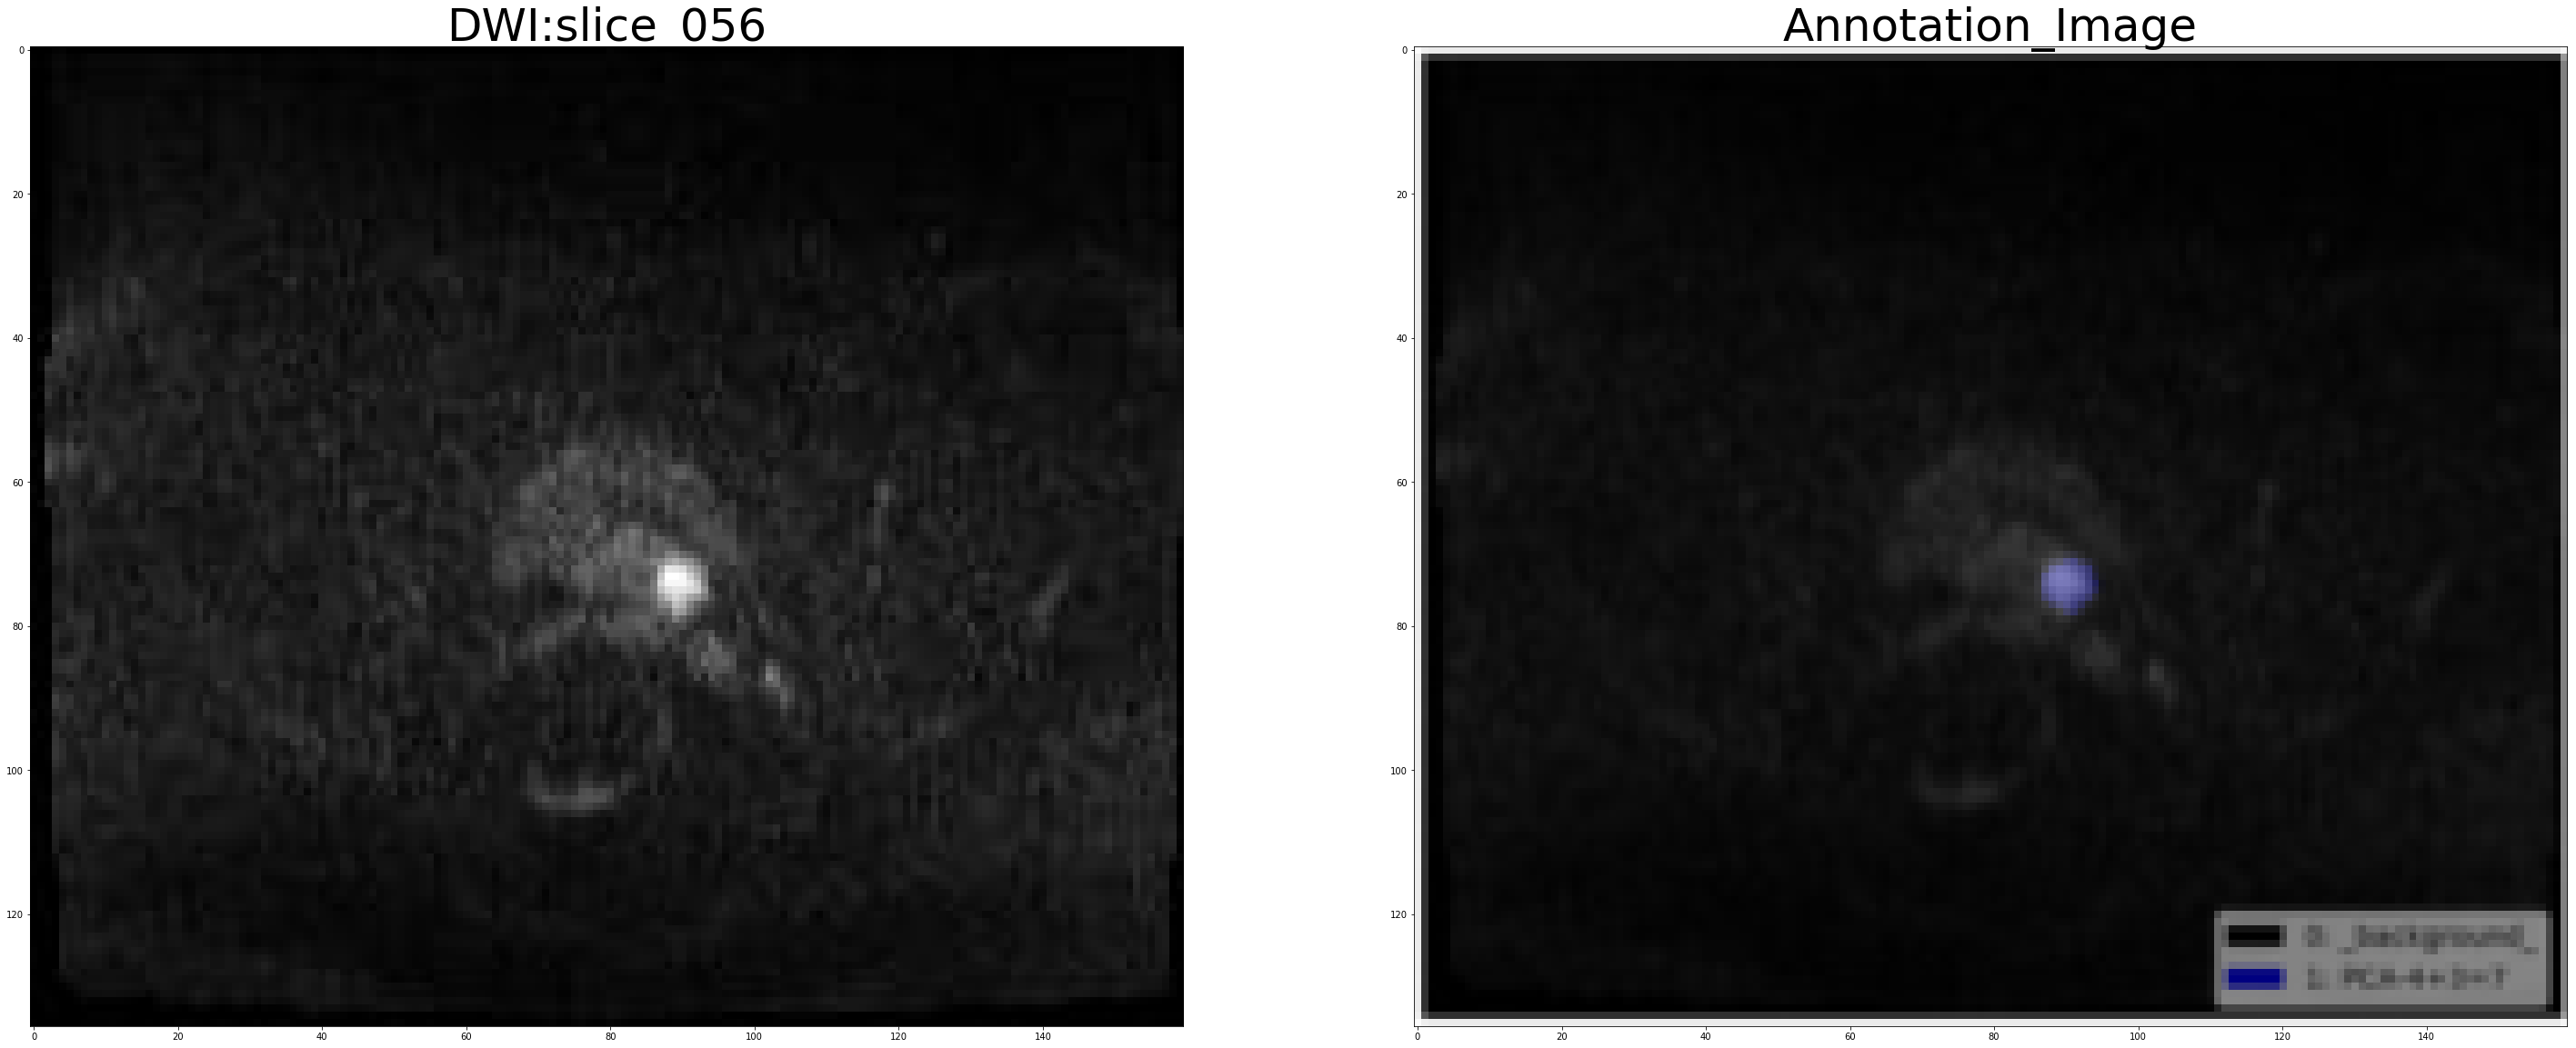

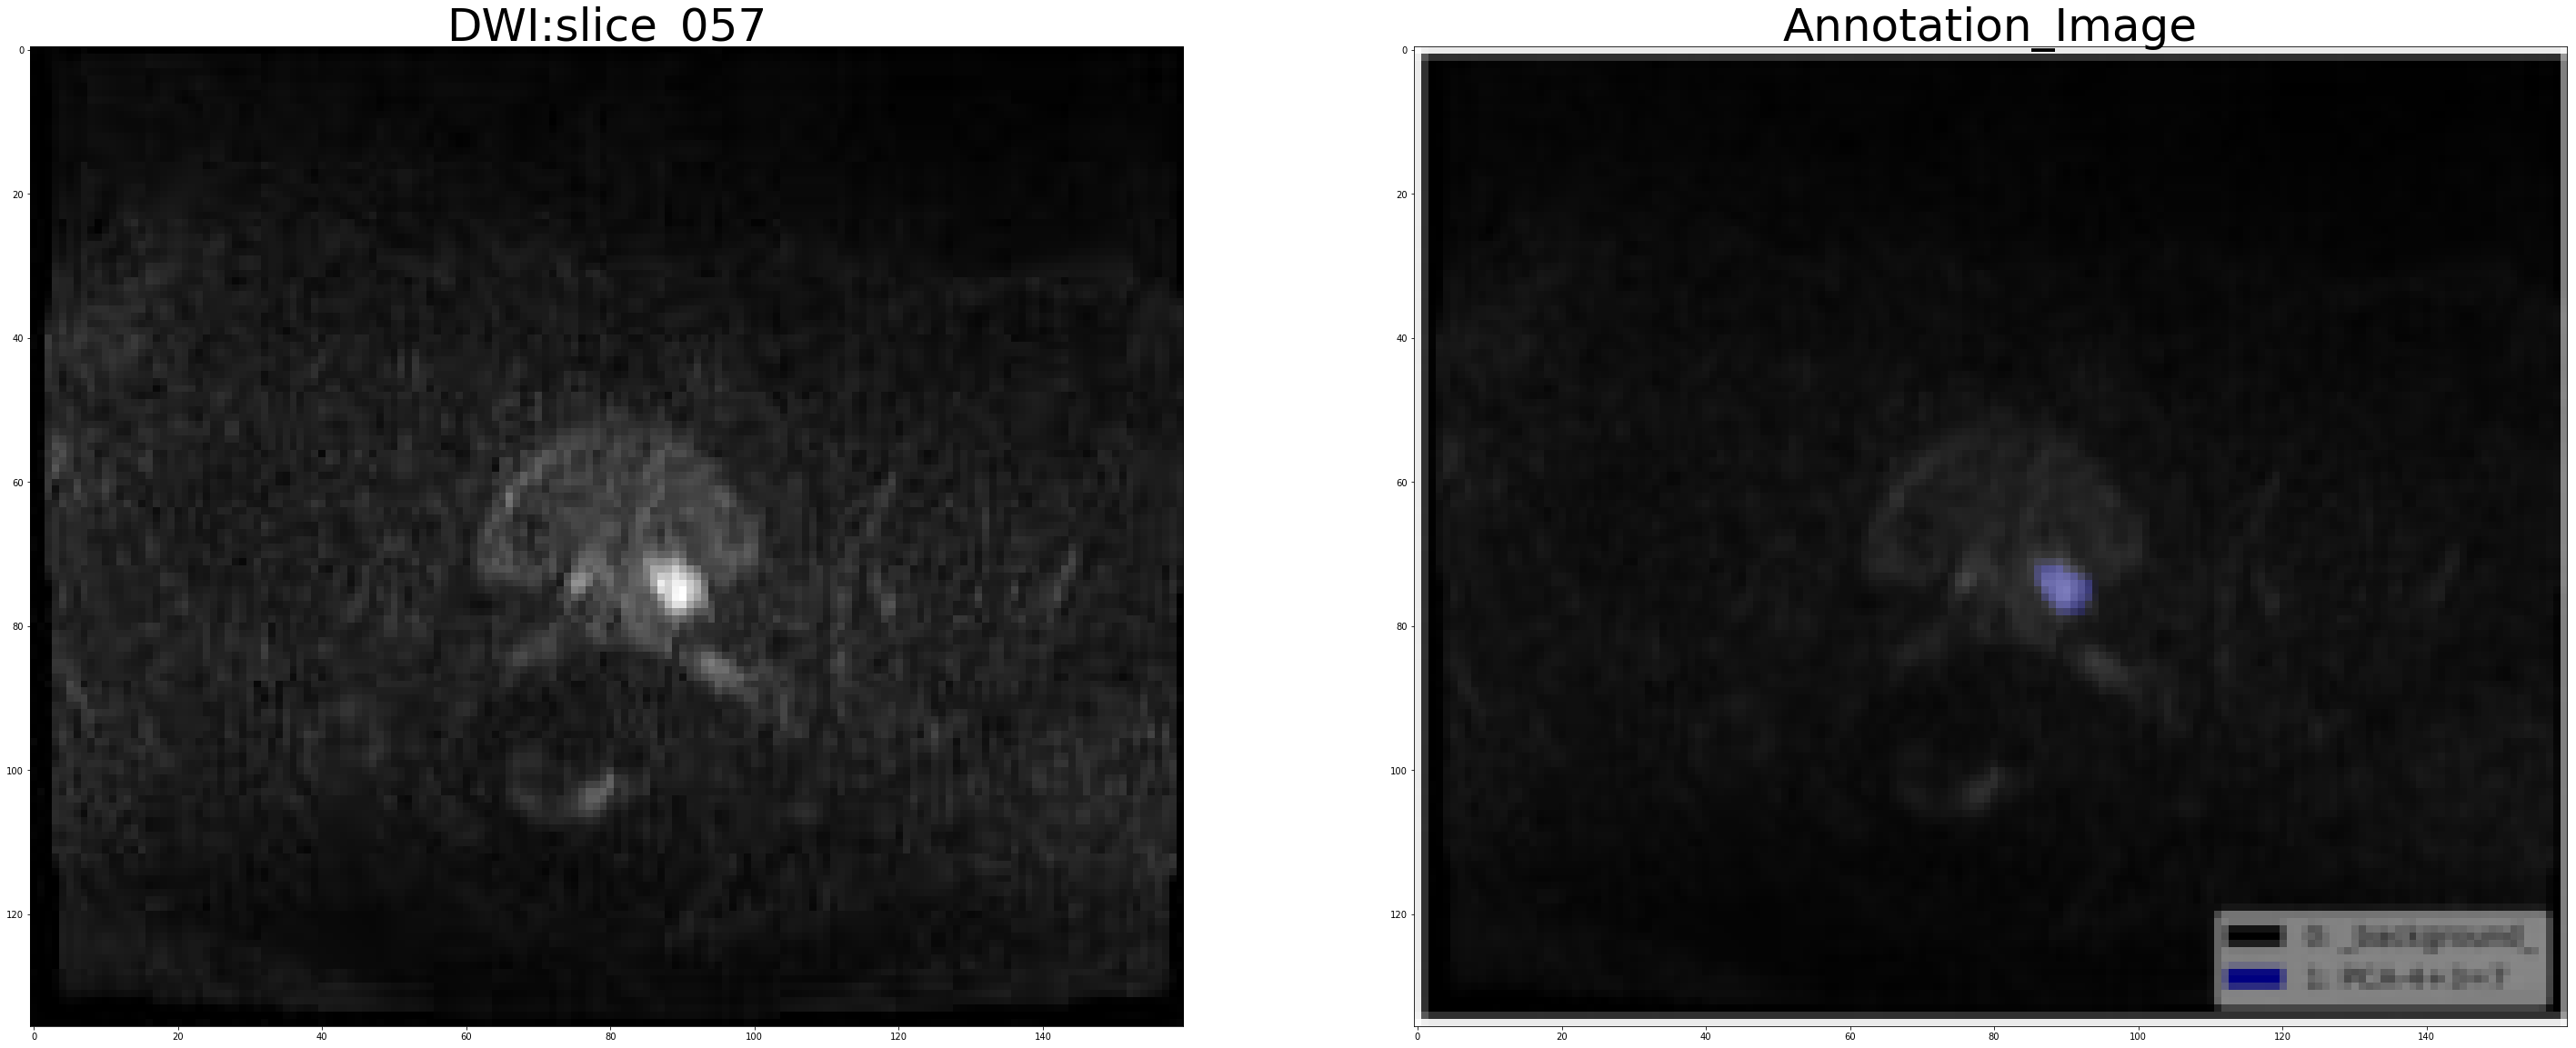

********************************************************************************************************************************************


In [4]:
# DIRCTORY  CATEGORY:
#     --Validate_Annotation.py
#     --anno (Dirctory)
#     --20181218_10_biaozhun  (Dirctory)
#       --Patient_1
#         --Image
#         --Mask

anno_files=glob('../20181218_10_biaozhun/*')
# print (anno_files)
# patient_name=os.listdir('../20181218_10_biaozhun/')
# patient_name

series='DWI'



for i,anno_file in enumerate(anno_files[:1]):
#     print (anno_file+'/Mask/'+series+'/*')

    json_files=glob(anno_file+'/Mask/'+series+'/*/*')
    
    if len(json_files)>0:
        patient_name=json_files[0].split('/')[1].split('\\')[-1]
#         print ('%d.Patient Name: %s'%(i+1,patient_name))

        for json_file in json_files:
            slice=json_file.split('/')[-1].split('\\')[-1][:-5]
            f,ax=plt.subplots(1,2,figsize=(50,100))
            os.system('labelme_json_to_dataset '+json_file+' -o anno')
            original_img=cv2.imread('./anno/img.png')
            anno_img=cv2.imread('./anno/label_viz.png')
            ax[0].imshow(original_img)
            ax[0].set_title(series+':'+slice, fontsize=50)
            ax[1].imshow(anno_img)
            ax[1].set_title('Annotation_Image', fontsize=50)

            plt.show()
    else:
        patient_no_name=anno_file.split('\\')[-1]
        print ('%d.Patient 【%s】 no annotation...'%(i+1,patient_no_name))
    print ('********************************************************************************************************************************************')
        
    


1.Patient Name: CAI_CAI_GEN_100063510


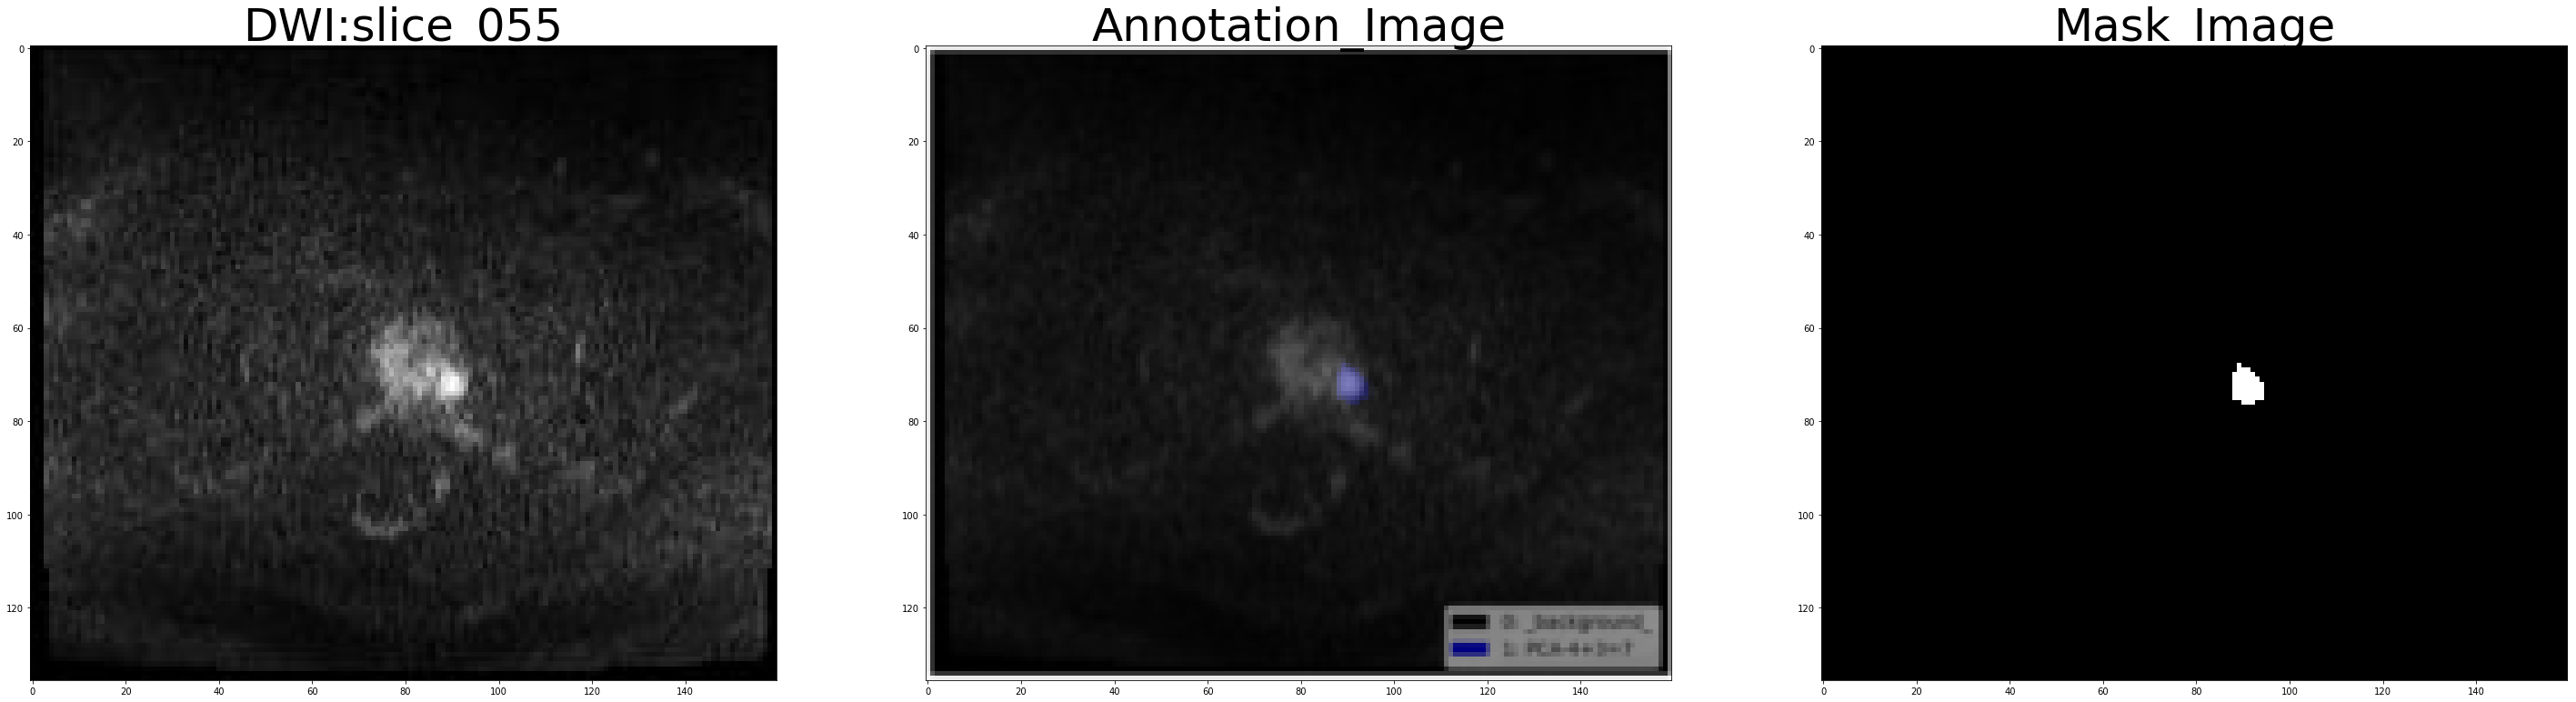

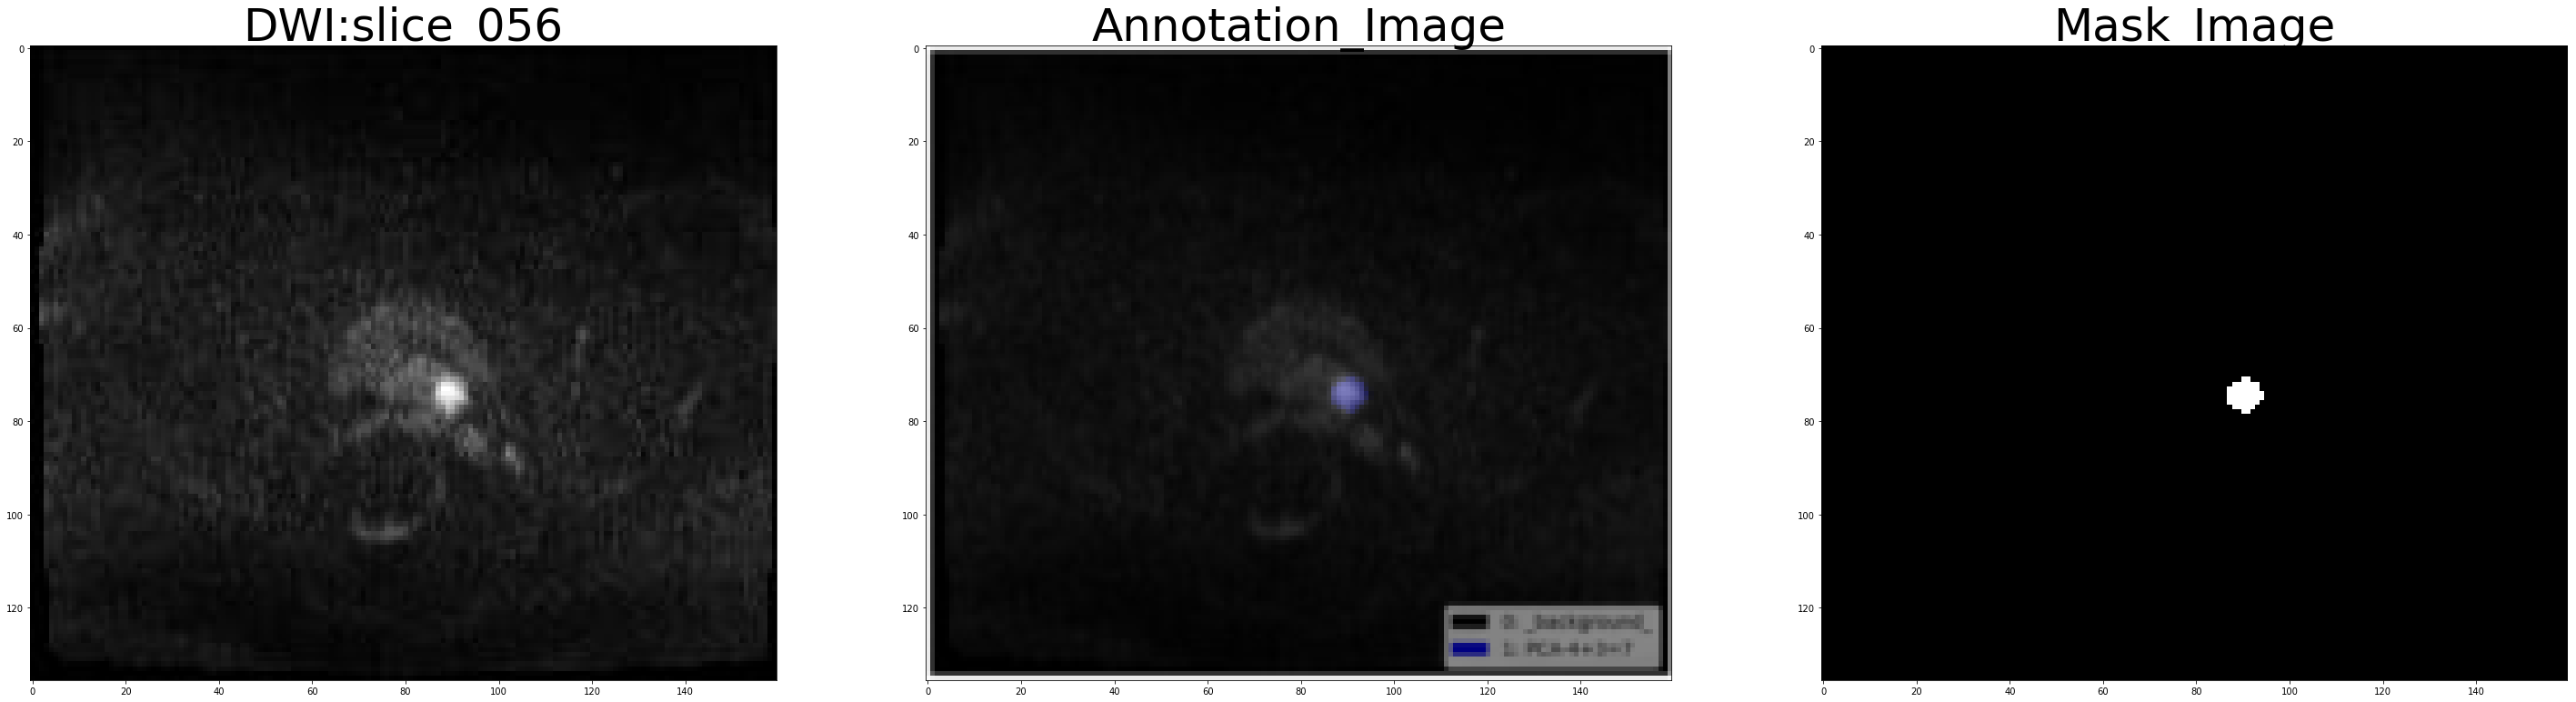

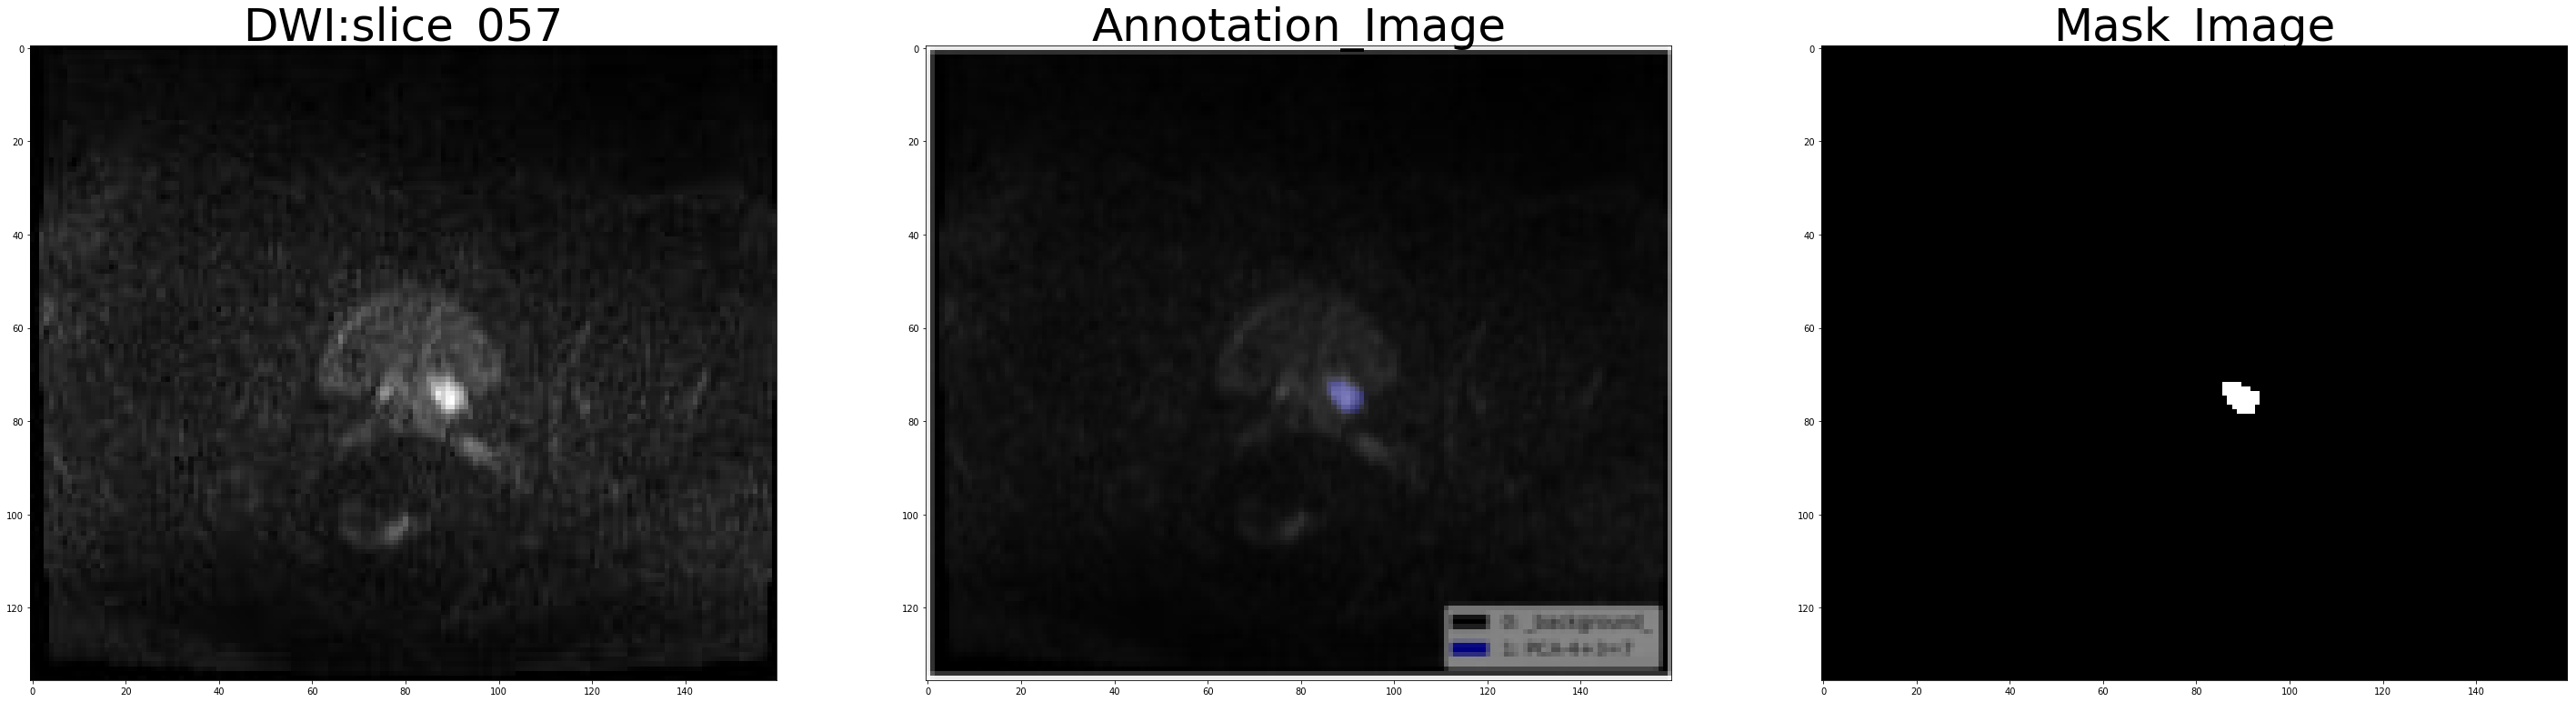

********************************************************************************************************************************************


In [33]:
# DIRCTORY  CATEGORY:
#     --Validate_Annotation.py
#     --anno (Dirctory)
#     --20181218_10_biaozhun  (Dirctory)
#       --Patient_1
#         --Image
#         --Mask

anno_files=glob('../20181218_10_biaozhun/*')
# print (anno_files)
# patient_name=os.listdir('../20181218_10_biaozhun/')
# patient_name

series='DWI'

# Draw_mask
def draw_mask(image):
    mask = np.zeros([image.shape[0], image.shape[1]], dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            at_pixel = image[i, j].all()
            if at_pixel > 0:
                mask[i,j] = 1
    return mask



# Visualize the annotation of the image 
def visualize_annotation(series,anno_files):

    for i,anno_file in enumerate(anno_files[:1]):
    #     print (anno_file+'/Mask/'+series+'/*')

        json_files=glob(anno_file+'/Mask/'+series+'/*/*')

        if len(json_files)>0:
            patient_name=json_files[0].split('/')[1].split('\\')[-1]
            print ('%d.Patient Name: %s'%(i+1,patient_name))

            for json_file in json_files:
                slice=json_file.split('/')[-1].split('\\')[-1][:-5]
                f,ax=plt.subplots(1,2,figsize=(50,100))
                os.system('labelme_json_to_dataset '+json_file+' -o anno')
                
                original_img=cv2.imread('./anno/img.png')
                anno_img=cv2.imread('./anno/label_viz.png')
                ax[0].imshow(original_img)
                ax[0].set_title(series+':'+slice, fontsize=50)
                ax[1].imshow(anno_img)
                ax[1].set_title('Annotation_Image', fontsize=50)

                plt.show()
        else:
            patient_no_name=anno_file.split('\\')[-1]
            print ('%d.Patient 【%s】 no annotation...'%(i+1,patient_no_name))
        print ('********************************************************************************************************************************************')

        
# Mask over image 
def mask_over_img():
    print ('Mask over image')

    
    
# Separate the multi_json files to single one json, remember to backup the original files if implement this function
def SeparatorMultiMask(json_path):
    (file_path,file_name) = os.path.split(json_path)
    with open(json_path,'r') as f:
        load_dict = json.load(f)
        #print(load_dict)
        if len(load_dict['shapes'])>1:
            for i in range(len(load_dict['shapes'])):
                print(i)
                new_shape = copy.deepcopy(load_dict)
                del new_shape['shapes'][i]
                new_file_name = file_path+'/'+file_name.split('.')[0]+'_'+str(i)+'.json'
                with open(new_file_name,"w") as fw:
                    json.dump(new_shape,fw)
                    print("Separate "+json_path+" to "+new_file_name)
            #***Remember to backup the annotation files if you want to remove original multi-label file****
            os.system("rm "+json_path)
            print("Warning: The original file will be removed!")        
 


# Generate the training data 
def generate_PCA_Seg_data(series,anno_files):

    for i,anno_file in enumerate(anno_files[:1]):
    #     print (anno_file+'/Mask/'+series+'/*')

        json_files=glob(anno_file+'/Mask/'+series+'/*/*')

        if len(json_files)>0:
            patient_name=json_files[0].split('/')[1].split('\\')[-1]
            print ('%d.Patient Name: %s'%(i+1,patient_name))

            for json_file in json_files:
                slice=json_file.split('/')[-1].split('\\')[-1][:-5]
                f,ax=plt.subplots(1,3,figsize=(50,100))
                os.system('labelme_json_to_dataset '+json_file+' -o anno')
                
                original_img=cv2.imread('./anno/img.png')
                mask_img=draw_mask(cv2.imread('./anno/label.png',0))
                anno_img=cv2.imread('./anno/label_viz.png')
                ax[0].imshow(original_img)
                ax[0].set_title(series+':'+slice, fontsize=50)
                ax[1].imshow(anno_img)
                ax[1].set_title('Annotation_Image', fontsize=50)
                ax[2].imshow(mask_img,cmap=plt.cm.gray)
                ax[2].set_title('Mask_Image', fontsize=50)
                plt.show()
        else:
            patient_no_name=anno_file.split('\\')[-1]
            print ('%d.Patient 【%s】 no annotation...'%(i+1,patient_no_name))
        print ('********************************************************************************************************************************************')

        
        
        
generate_PCA_Seg_data(series,anno_files)

In [ ]:
def draw_mask(mask, image):
    for i in range(image.width):
        for j in range(image.height):
            at_pixel = image.getpixel((i, j))
            if at_pixel > 0:
                mask[i,j] = 1
    return mask



img = Image.open('Data/20181218_10_biaozhun/CAI_CAI_GEN_100063510/Mask/ADC/7/slice_015/label.png')

mask = np.zeros([img.width, img.height], dtype=np.uint8)
mask = draw_mask(mask, img)
